[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/Simple-eye-detection-tests-ML/blob/master/Hello,_Colaboratory.ipynb)

In [0]:
# # !wget https://youtu.be/z008GkZ_cgA?t=46
# # !rm 'index.html'
# # !rm "images"

# !pip install moviepy
# !pip install Youtube-dl

# import cv2
# import time
# import matplotlib.pyplot as plt
# import moviepy
# from moviepy.editor import VideoFileClip
# import glob
# %matplotlib inline
# import numpy as np

# !mkdir "images_test_25_t0_40"
# !youtube-dl "https://youtu.be/z008GkZ_cgA"
# !mv "Prescribed Burning the 'Switchback' Unit, in Orleans California.-z008GkZ_cgA.mp4" "images_test_25_t0_40/test_video1.mp4"
# 






# !ls -ltr

In [0]:


def Test_pipeline(img):

  cv2.imwrite("images_test_25_t0_40/image_"+str(time.time())+".jpg",img)
  return img
  

In [12]:


video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('images_test_25_t0_40/test_video1.mp4').subclip(25,40)
processed_video = video_input1.fl_image(Test_pipeline)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 225/226 [00:19<00:00, 11.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 4.2 s, sys: 803 ms, total: 5 s
Wall time: 22.3 s


227


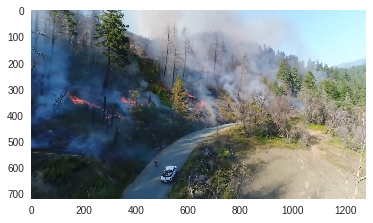

In [13]:
fire_images= glob.glob('images_test_25_t0_40/*.jpg')
print(len(fire_images))

def read_image(img_path= fire_images[10]):
  return cv2.cvtColor(plt.imread(img_path), cv2.COLOR_BGR2RGB)

def get_all_images(img):
  images=[]
  for img_path in fire_images:
    images.append(read_image(img_path))
  return images

# print(len(fire_images))
plt.imshow(read_image())
plt.grid(False)

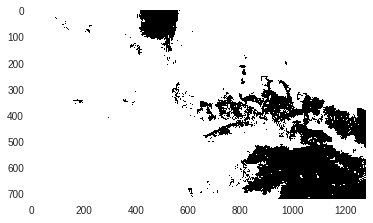

In [14]:
def LAB(img):
  lab= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
  return lab

def get_regions_above_mean(img_channel):
  mean= np.mean(img_channel)
  img_channel[img_channel<mean]=0 
  img_channel[img_channel>=mean]=1
  
  return img_channel

def get_fire_color_info(a_star,b_star):
  h, w= a_star.shape
  c= np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      if b_star[i,j]>= a_star[i,j]:
        c[i,j]=1
  return c.astype(int) 
   
def get_LAB_star(lab):
  l,a,b= cv2.split(lab)
  l_star= get_regions_above_mean(l)
  a_star= get_regions_above_mean(a)
  b_star= get_regions_above_mean(b)
  return l_star,a_star,b_star


def get_binary_AND(channel_1,channel_2):
  return np.bitwise_and(channel_1,channel_2)


def apply_color_based_approach(img):
  l_star,a_star,b_star= get_LAB_star(LAB(img))
  fire_color= get_fire_color_info(a_star,b_star)
  temp1= get_binary_AND(l_star, a_star)
  temp2= get_binary_AND(temp1, b_star)
  bin_mask= get_binary_AND(temp2, fire_color)
  return bin_mask

img=read_image()
bin_mask= apply_color_based_approach(img)
plt.imshow(bin_mask)
plt.grid(False)


In [0]:
from mpl_toolkits.mplot3d import Axes3D
# !mkdir "FireImagesFromInternet"
# !mkdir "FireImagesFromInternet_mask"
# image_folder= "FireImagesFromInternet"
# mask_folder= "FireImagesFromInternet_mask"

# !mkdir "full_fire_images"
image_folder= "full_fire_images"
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()

# import os
# fire_images1= glob.glob('*.jpg')
# for i in fire_images1:
#   os.rename(i, "full_fire_images/"+i)
# !ls -lrt

# dict_images_and_masks={}
image_paths= glob.glob(image_folder+"/*.jpg")
# def get_images_and_masks():
#   for image_path in image_paths:
#     image_name= image_path.split('/')[1].split('.')[0]
#     mask_name= image_name+'_mask.jpg'
#     mask_path= mask_folder+"/"+mask_name
#     dict_images_and_masks[image_path]= mask_path
#   return dict_images_and_masks  
    
# dict_images_and_masks= get_images_and_masks()

# for key in dict_images_and_masks.keys():
#   image= cv2.cvtColor(plt.imread(key), cv2.COLOR_RGB2LAB) 
#   mask= cv2.cvtColor(plt.imread(dict_images_and_masks[key]),cv2.COLOR_RGB2GRAY) 
#   mask[mask<=50]=0
#   mask[mask>50]=1
  
#   img_cpy= np.copy(image)
#   img_cpy[mask==0]=0
#   plt.imshow(img_cpy)
#   plt.grid(False)
#   break
#   print(dict_images_and_masks[key])


for image_path in image_paths:
  image= cv2.cvtColor(plt.imread(image_path), cv2.COLOR_RGB2LAB) 
  resized_image = cv2.resize(image, (100, 100)) 
  l_star, a_star, b_star = get_LAB_star(resized_image)
  P1= l_star-a_star
  P1
  P2= l_star-b_star
  P3= a_star-b_star
  
  plt.imshow(img_cpy)
  plt.grid(False)
  